# **1. Introduction**

What I love in Data Science is that it can be apply to any subject, and above all, this science can help to understand the world better. I'm pretty sure that healthcare could benefit a lot from digital and data, that's why I digged into this medical dataset. The aim here is to use common data analysis and machine learning tools to explain heart diseases.
After preparing the data, I will do a quick analysis of the variables, before digging into a modellisation which aims to predict if a patient has a heart disease or not.
To perform this classification, I will first use a logistic regression and then, a Random Forest algorithm.

In [171]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/heart-disease-uci/heart.csv


# ** 1. Data preparation and exploration**

In [172]:
#Load the data

dt = pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")

# Take a look at the data

dt.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

Variable definitions

- age: age in years
- sex: (1 = male; 0 = female)
- cpchest: the chest pain type (0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic)
- trestbpsresting: blood pressure (in mm Hg on admission to the hospital)
- cholserum: cholestoral in mg/dl
- fbs:(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: theslope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: 1 or 0

Let's rename columns to make them clearer and change the value of some categorical variables to them transform them into dummies variables, and then, check data types.

In [173]:
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'resting_electrocard', 'max_heart_rate_achieved', 'exercice_induced_angina', 'oldpeak', 'slope', 'nb_major_vessels', 'thalassemia', 'target']
dt.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
resting_electrocard          int64
max_heart_rate_achieved      int64
exercice_induced_angina      int64
oldpeak                    float64
slope                        int64
nb_major_vessels             int64
thalassemia                  int64
target                       int64
dtype: object

In [174]:
dt.describe()

age         sex  chest_pain_type  resting_blood_pressure  \
count  303.000000  303.000000       303.000000              303.000000   
mean    54.366337    0.683168         0.966997              131.623762   
std      9.082101    0.466011         1.032052               17.538143   
min     29.000000    0.000000         0.000000               94.000000   
25%     47.500000    0.000000         0.000000              120.000000   
50%     55.000000    1.000000         1.000000              130.000000   
75%     61.000000    1.000000         2.000000              140.000000   
max     77.000000    1.000000         3.000000              200.000000   

       cholesterol  fasting_blood_sugar  resting_electrocard  \
count   303.000000           303.000000           303.000000   
mean    246.264026             0.148515             0.528053   
std      51.830751             0.356198             0.525860   
min     126.000000             0.000000             0.000000   
25%     211.000000             0.000000             0.000000   
50%     240.000000             0.000000             1.000000   
75%     274.500000             0.000000             1.000000   
max     564.000000             1.000000             2.000000   

       max_heart_rate_achieved  exercice_induced_angina     oldpeak  \
count               303.000000               303.000000  303.000000   
mean                149.646865                 0.326733    1.039604   
std                  22.905161                 0.469794    1.161075   
min                  71.000000                 0.000000    0.000000   
25%                 133.500000                 0.000000    0.000000   
50%                 153.000000                 0.000000    0.800000   
75%                 166.000000                 1.000000    1.600000   
max                 202.000000                 1.000000    6.200000   

            slope  nb_major_vessels  thalassemia      target  
count  303.000000        303.000000   303.000000  303.000000  
mean     1.399340          0.729373     2.313531    0.544554  
std      0.616226          1.022606     0.612277    0.498835  
min      0.000000          0.000000     0.000000    0.000000  
25%      1.000000          0.000000     2.000000    0.000000  
50%      1.000000          0.000000     2.000000    1.000000  
75%      2.000000          1.000000     3.000000    1.000000  
max      2.000000          4.000000     3.000000    1.000000

In [175]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                        303 non-null int64
sex                        303 non-null int64
chest_pain_type            303 non-null int64
resting_blood_pressure     303 non-null int64
cholesterol                303 non-null int64
fasting_blood_sugar        303 non-null int64
resting_electrocard        303 non-null int64
max_heart_rate_achieved    303 non-null int64
exercice_induced_angina    303 non-null int64
oldpeak                    303 non-null float64
slope                      303 non-null int64
nb_major_vessels           303 non-null int64
thalassemia                303 non-null int64
target                     303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


One good news: our dataset doesn't have any null value nor missing value!
Let's check the proportion of heart disease in our dataset:

In [176]:
dt.target.value_counts()

1    165
0    138
Name: target, dtype: int64

So we have a bit more heart disease than safe people, but the sample is well balanced, which is a good point: we don't need to balance it. Let's get the exact proportion

In [177]:
len(dt[dt.target == 0])/len(dt.target)

0.45544554455445546

So, 45.5% of our sample didn't experience an heart disease.
Let's compare the mean of each variable depending on if they experiment an heart disease or not

In [178]:
dt.groupby('target').mean()

age       sex  chest_pain_type  resting_blood_pressure  \
target                                                                 
0       56.601449  0.826087         0.478261              134.398551   
1       52.496970  0.563636         1.375758              129.303030   

        cholesterol  fasting_blood_sugar  resting_electrocard  \
target                                                          
0        251.086957             0.159420             0.449275   
1        242.230303             0.139394             0.593939   

        max_heart_rate_achieved  exercice_induced_angina   oldpeak     slope  \
target                                                                         
0                    139.101449                 0.550725  1.585507  1.166667   
1                    158.466667                 0.139394  0.583030  1.593939   

        nb_major_vessels  thalassemia  
target                                 
0               1.166667     2.543478  
1               0.363636     2.121212

Those results are a bit surprising! Indeed, those who did'nt have an heart disease are on average a bit older, with more cholesterol and more likely to be a man.

Let's check how the frequency of some categorical variables has an impact on the target

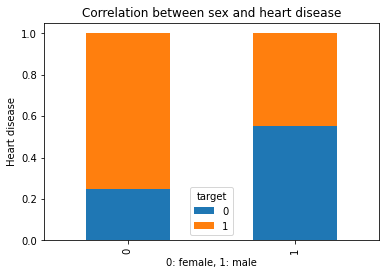

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt
table = pd.crosstab(dt.sex,dt.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Correlation between sex and heart disease')
plt.xlabel("0: female, 1: male")
plt.ylabel('Heart disease')
plt.savefig('heart_disease_by_sex')

In our dataset, the % of women having a heart disease is by far higher than the men.

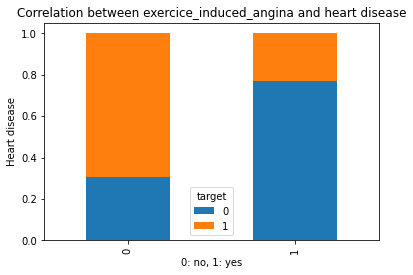

In [180]:
table = pd.crosstab(dt["exercice_induced_angina"],dt.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Correlation between exercice_induced_angina and heart disease')
plt.xlabel("0: no, 1: yes")
plt.ylabel('Heart disease')
plt.savefig('heart_disease_by_exercice_induced_angina')


Those who have chest disconfort during exercice are very less likely to experience an heart disease than those who don't.

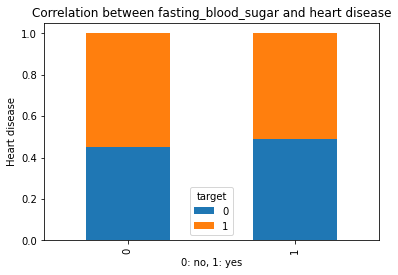

In [181]:
table = pd.crosstab(dt["fasting_blood_sugar"],dt.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Correlation between fasting_blood_sugar and heart disease')
plt.xlabel("0: no, 1: yes")
plt.ylabel('Heart disease')
plt.savefig('heart_disease_by_fbs')

It doesn't seem that fasting blood sugar impacts a lot on heart disease.

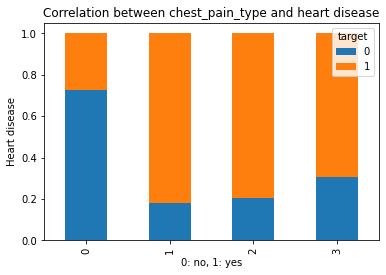

In [182]:
table = pd.crosstab(dt["chest_pain_type"],dt.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Correlation between chest_pain_type and heart disease')
plt.xlabel("0: no, 1: yes")
plt.ylabel('Heart disease')
plt.savefig('heart_disease_by_chest_pain_type')

Having a typical angina (type 0) should not lead to heart disease, but other types of angina (types 1, 2, 3) are very likely to lead to an heart disease.

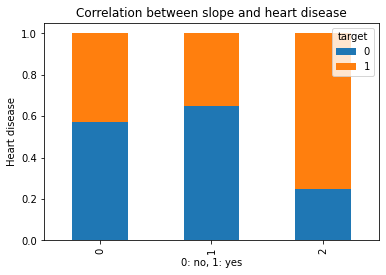

In [183]:
table = pd.crosstab(dt["slope"],dt.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Correlation between slope and heart disease')
plt.xlabel("0: no, 1: yes")
plt.ylabel('Heart disease')
plt.savefig('heart_disease_by_slope')

When the slope of the peak exercice is downsloping (value 2), the patient is more likely to have a heart disease than when it is upsloping or flat.

Let's create dummies variable and do a bit of feature engineering

In [184]:
dt['chest_pain_type'][dt['chest_pain_type'] == 0] = 'typical_angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'atypical_angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'non_anginal_pain'
dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'asymptomatic'

dt['resting_electrocard'][dt['resting_electrocard'] == 0] = 'normal'
dt['resting_electrocard'][dt['resting_electrocard'] == 1] = 'medium'
dt['resting_electrocard'][dt['resting_electrocard'] == 2] = 'high'

dt['slope'][dt['slope'] == 1] = 'upsloping'
dt['slope'][dt['slope'] == 2] = 'flat'
dt['slope'][dt['slope'] == 3] = 'downsloping'

dt['thalassemia'][dt['thalassemia'] == 1] = 'normal'
dt['thalassemia'][dt['thalassemia'] == 2] = 'fixed defect'
dt['thalassemia'][dt['thalassemia'] == 3] = 'reversable defect'

dt = pd.get_dummies(dt, drop_first=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

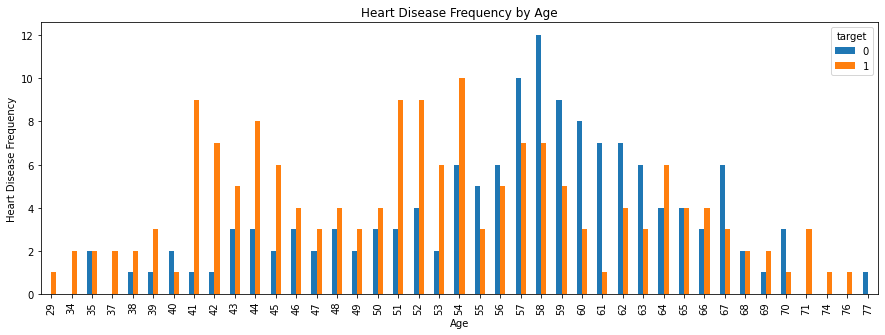

In [185]:
pd.crosstab(dt.age,dt.target).plot(kind="bar",figsize=(15,5))
plt.title('Heart Disease Frequency by Age')
plt.xlabel('Age')
plt.ylabel('Heart Disease Frequency')
plt.savefig('heartDiseaseByAge.png')
plt.show()

    As the sample is not that big, we couldn't really conclude by age on this distribution as results are not significants. However, we see a trend: among young people in the sample, the proportion of having an heart disease is higher than the proportion of not having one, while it's the reverse for older people. So it could be interesting to separate the age variable into group of ages: young people <55, and senior (>=55).

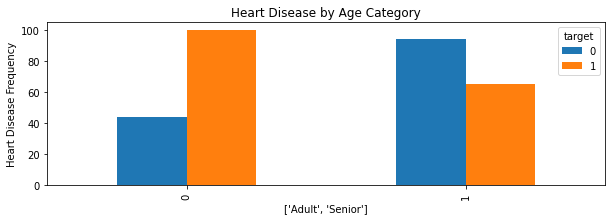

In [186]:
#let's define a variable "Senior", where 1 is >=55 and 0 is <55, and drop the age variable
dt["senior"] = pd.cut(dt.age,bins=[0,54,99],labels=["0", "1"])

pd.crosstab(dt.senior, dt.target).plot(kind="bar",figsize=(10,3))

plt.title('Heart Disease by Age Category')
plt.xlabel(['Adult', 'Senior'])
plt.ylabel('Heart Disease Frequency')
plt.savefig('heartDiseaseByAgeCategory.png')
plt.show()
dt = dt.drop("age", 1)

# 2. ****Data modelisation****

# 2.1 Logistic regression

****Logistic Regression Assumptions****

- Binary logistic regression requires the dependent variable to be binary.
- For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
- Only the meaningful variables should be included.
- The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
- The independent variables are linearly related to the log odds.
- Logistic regression requires quite large sample sizes.

The dependent variable 'target' is binary, so we could handle a logistic regression. But before, let's do a correlation matrix to display correlation coefficients between variables. 

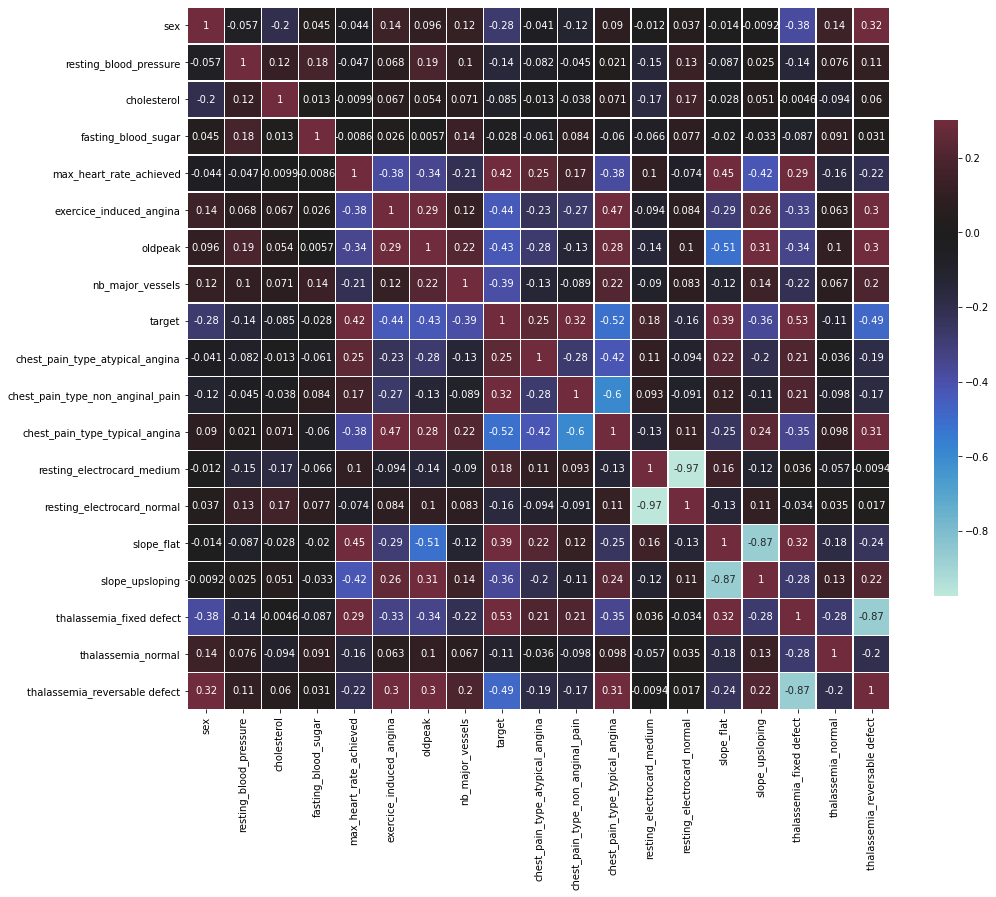

In [193]:
plt.figure(figsize=(15,15))
sns.heatmap(dt.corr(),vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.tight_layout()
plt.show()

Values in a correlation matrix stand between -1 and +1, where slightly positive correlation features can be something like 0.5, and strong correlation is > 0.8. Here, we don't have those kind of correlation, so we don't need to perform a PCA before doing our logistic regression.
Another interesting point we can conclude from the matrix is that cholesterol and fasting blood sugar are the lowest correlated variables with the target. We could decide not to use them in the model.

So, let's perform our logistic regression!

In [188]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

y = dt["target"]
x_brut = dt.drop("target", 1)

# Normalize data
scaler = MinMaxScaler()
scaler.fit(x_brut)
x = scaler.transform(x_brut)
# Split between train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state=10) 

def compute_score(clf, x, y):
    xval = cross_val_score(clf, x, y, cv=5)
    return print(np.mean(xval))

lr = LogisticRegression(max_iter = 4000)
compute_score(lr, x_train, y_train)
lr.fit(x_train, y_train)
print(lr.coef_, dt.columns)


0.8472789115646258
[[-1.15684818 -0.55698246 -0.57307981 -0.04896667  0.95615289 -0.73038911
  -0.78742649 -2.27910048  0.0815646   0.34861322 -1.32778021  0.24138088
  -0.05382341  0.5600901  -0.41625652  0.57053488  0.11016362 -0.46488799
  -0.54626091]] Index(['sex', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar',
       'max_heart_rate_achieved', 'exercice_induced_angina', 'oldpeak',
       'nb_major_vessels', 'target', 'chest_pain_type_atypical_angina',
       'chest_pain_type_non_anginal_pain', 'chest_pain_type_typical_angina',
       'resting_electrocard_medium', 'resting_electrocard_normal',
       'slope_flat', 'slope_upsloping', 'thalassemia_fixed defect',
       'thalassemia_normal', 'thalassemia_reversable defect', 'senior'],
      dtype='object')


So, with not that much re-working on variables, and by passing all of them in the logistic regression, we yet have quite great results. 
Printing coefficients of each variables explains us how each variable affects the model.
We can then conclude that being a woman, having nb of major vessels and chest_pain_type_non_anginal_pain
Age (already taken into account in the senior var), resting_blood_pressure, cholesterol, fasting_blood_sugar, max_heart_rate_achieved and resting_electrocard_medium don't seem to impact a lot the prediction.
We could iterate to have a better score, by doing a deeper feature engineering and meticulously choosing best explanatory variables, but I prefer to jump to a more performing algorithm instead.

# 2.2 Random Forest

In [189]:
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(x_brut, y, test_size = .2, random_state=10) 

model = RandomForestClassifier(max_depth=5)
compute_score(model, x_train, y_train)
model.fit(x_train, y_train)

0.8517006802721088


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

We directly have a better score than the one we got from the logistic regression, without having to work on variables. But this algorithm is more blackbox, so we don't have a direct access to the weight of each coefficient here, making this model less explicative even if more performant. But we can plot the decision tree to grasp some information.

In [190]:
from sklearn.tree import export_graphviz

estimator = model.estimators_[1]
feature_names = [i for i in x_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no heart disease'
y_train_str[y_train_str == '1'] = 'heart disease'
y_train_str = y_train_str.values

#code from https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c

export_graphviz(estimator, out_file='heart_disease_tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'heart_disease_tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

Let's evaluate the model by building its confusion matrix and computing sensitivity(ie true positive rate), specificity (ie false positive rate) and AUC (area under the curve)

In [191]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

y_predict = model.predict(x_test)
y_predict_proba = model.predict_proba(x_test)[:, 1]
y_pred_bin = model.predict(x_test)
confusion_matrix = confusion_matrix(y_test, y_pred_bin)
print(confusion_matrix)

total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

fpr, tpr, thresholds = roc_curve(y_test, y_predict_proba)

print('AUC', auc(fpr, tpr))

[[27  8]
 [ 5 21]]
Sensitivity :  0.84375
Specificity :  0.7241379310344828
AUC 0.9010989010989011


Results are quite good :) 
Let's look at SHAP values to interpret the impact of having a certain value for a given feature in comparison to the prediction we'd make if that feature took some baseline value.

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


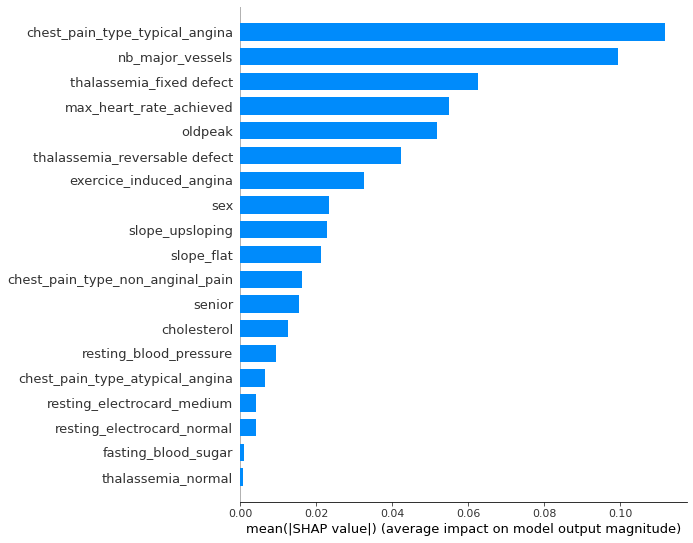

In [192]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values[1], x_test, plot_type="bar")

# Conclusions
# 
Unsurprisingly, having a normal thalassemia and resting electrocard doesn't impact on heart disease. 
As we saw in the correlation matrix, cholesterol and fasting blood sugar doesn't impact as well.
On the reverse, the number of major vessels and max heart rate are at the top.